In [1]:
import numpy as np
import pandas as pd

# add the src folder to the path
import sys
sys.path.append('../')

import seaborn as sns
import matplotlib.pyplot as plt
from src.search import grid_search, grid_search_cv
from src.utils import load_moons, load_cup, load_monk1
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy,  MeanEuclideanError
from src.callbacks import  EarlyStopping, Callback
from sklearn.metrics import accuracy_score

model = Network(9)
model.add_layer(2, ReLU())
model.add_layer(2, Sigmoid())

In [2]:
x_train, x_val, y_train, y_val,  scaler = load_cup(validation=True, scale_outputs=True)


In [8]:
model = Network(9)
model.add_layer(32, ReLU())
model.add_layer(2, Sigmoid())
stats=model.train(train=(x_train,y_train),validation=(x_val,y_val),epochs= 1000,eta= 0.05, callbacks=[EarlyStopping(patience=50)], metric=MeanEuclideanError(), loss= MeanSquaredError())
print(stats)

Training:  44%|████▍     | 444/1000[, loss=0.00378, val_loss=0.00476, val_acc=0.0749]

Early stopping


In [18]:
print(stats['train_loss'][-1], stats['val_loss'][-1],stats['val_acc'][-1])

0.003775748196046457 0.0047552469561114655 0.07494373436845876


In [12]:
X=np.append(x_train, y_train)
outs= model.multiple_outputs(X)
outs.shape = outs.shape[0], outs.shape[1], 
outs.shape

TypeError: object of type 'numpy.float64' has no len()

<AxesSubplot: >

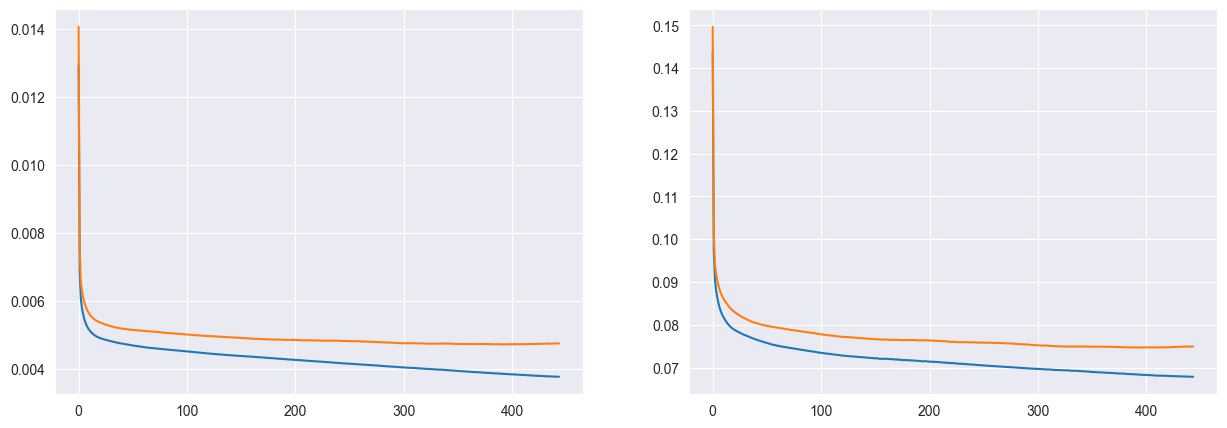

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [ ]:
scaler.inverse_transform(outs)

In [ ]:
grid_search_cv(model, X, y, metric=MeanEuclideanError(), loss=MeanSquaredError(), eta=(1e-2,), nesterov=(0.8,), reg_type=(None,), reg_val=(0,), epochs=1000, scaler=scaler)